## Estimation of memory to run PyGBe 

We want to know an estimation of the memory needs (GPU) to run bigger problem that what we've been running with PyGBe.

In this notebook we are showing some results on memory profiling obtained using **nvprof** (Nvidia profiler) for different problem sizes. 

We used a TESLA C2075 Nvidia GPU to make the runs.   


| Protein | Num. of atoms | Num. of elem. (d=2) |
|:-------:|:-------------:|:-------------------:|
|  1PGB   |      862      |         11696       |
|  1HEL   |      1323     |         21944       |
|  3BTK   |      4074     |         39432       |
|  1IGT   |      20147    |         225512      |


In [49]:
import numpy
from matplotlib import pyplot
from scipy.stats import linregress
%matplotlib inline

In [2]:
atoms = numpy.array([862,1323,4074,20147])
elements = numpy.array([11696,21944,39432,225512])

In [3]:
fit = numpy.polyfit(atoms, elements, 1)
fit_fn = numpy.poly1d(fit)

In [50]:
std_err = numpy.std(elements)
print(std_err)
fit_std_plus = fit_fn(atoms) + std_err
fit_std_minus = fit_fn(atoms) - std_err

87665.2426221


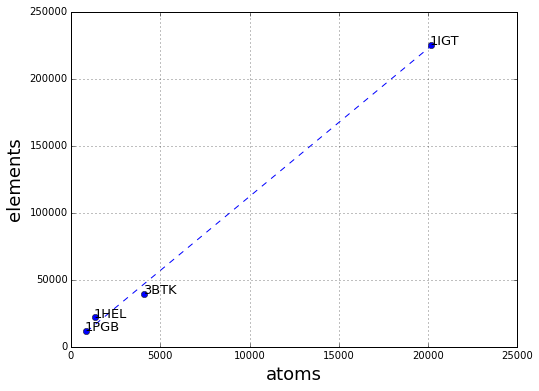

In [55]:
# Regression of number of elements according to number of atoms
pyplot.figure(figsize=(8,6))
pyplot.grid(True)

label = ['1PGB','1HEL','3BTK','1IGT']
for i, txt in enumerate(label):
    pyplot.annotate(txt, (atoms[i],elements[i]), rotation=0, fontsize=13)

pyplot.xlabel('atoms', fontsize=18)
pyplot.ylabel('elements', fontsize=18)
#pyplot.plot(atoms, fit_std_plus, '--r', label='$\sigma_{err}$')
#pyplot.plot(atoms,fit_std_minus, '--r')
#pyplot.annotate('$+\sigma_{err}$', (atoms[3],fit_std_plus[3]), fontsize=16)
#pyplot.annotate('$-\sigma_{err}$', (atoms[3],fit_std_minus[3]), fontsize=16);
pyplot.plot(atoms,elements, 'ob', atoms, fit_fn(atoms), '--b');



In [59]:
#estimate of elements for 1 and 3 million atoms according to the regression
elem_1Ma = fit_fn(1000000)
elem_dengue = fit_fn(1082160)
elem_3Ma = fit_fn(3000000)


print ('for 1M atoms: {:f} elements'.format(elem_1Ma))
print ('for dengue viruses: {:f} elements'.format(elem_dengue))
print ('for 3M atoms: {:f} elements'.format(elem_3Ma))


for 1M atoms: 11060054.922977 elements
for dengue viruses: 11968613.972655 elements
for 3M atoms: 33176876.969673 elements


According to the regression, the amount of elements on a mesh of density $d=2$ on MSMS for a 1 million atoms protein and for a 3 million atoms protein are approximately 11 and 33 millions respectively. 

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open('styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()